<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Unsupervised_Similar_Images_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import glob
import shutil
import skimage
import IPython
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab.patches import cv2_imshow

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d jessicali9530/stanford-cars-dataset
!unzip \*.zip && rm *.zip
IPython.display.clear_output()

In [44]:
data = glob.glob('/content/cars_train/cars_train/*.jpg')
len(data)

8144

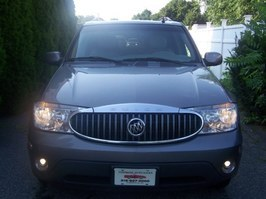

(199, 266, 3)

In [4]:
N=0
N+=1
img = cv2.imread(data[N])
cv2_imshow(img)
img.shape

In [5]:
os.makedirs(f'/content/dataset/', exist_ok=True)

counter = 0
for i in data[:20]:
  for _ in range(6):
    counter += 1
    shutil.copyfile(i, f'/content/dataset/{counter}.jpg')

In [6]:
dataset = glob.glob('/content/dataset/*.jpg')

In [9]:
def max_pooling(img, pad_size=20):
  image = img[:, :, 0] + img[:, :, 1] + img[:, :, 2]
  max_pool_img = skimage.measure.block_reduce(image, (pad_size,pad_size), np.max)
  return max_pool_img

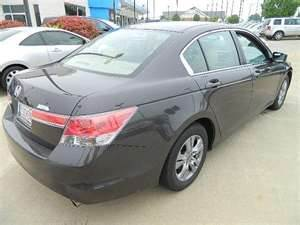

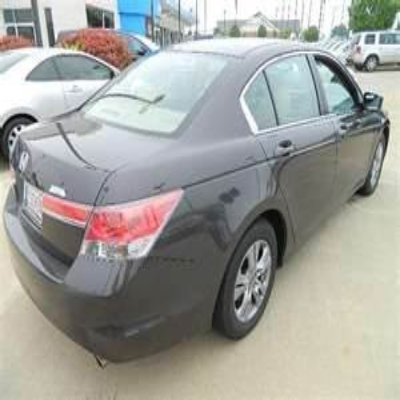

(20, 20)

In [10]:
d = dataset[0]
img = cv2.imread(d)
cv2_imshow(img)
img = cv2.resize(img, (400, 400))
cv2_imshow(img)
img = max_pooling(img, pad_size=20)
cv2_imshow(img)
img.shape

In [11]:
arr = []
for d in dataset:
  img = cv2.imread(d)
  img = cv2.resize(img, (400, 400))
  img = max_pooling(img, pad_size=25)
  img = np.ravel(img)
  arr.append(img)

In [41]:
mse_arr = []
for i, A in enumerate(arr):
  temp = []
  for j, B in enumerate(arr):
    mse = ((A - B)**2).mean()
    if mse < 10 and i!=j:
      temp.append(dataset[j])
  mse_arr.append(temp)

In [43]:
arr
#  [mse_arr[0]]
# dataset
# np.array(dataset).loc[3, 17, 42, 65, 101]
# dataset[3, 17]
mse_arr

[['/content/dataset/17.jpg',
  '/content/dataset/13.jpg',
  '/content/dataset/15.jpg',
  '/content/dataset/14.jpg',
  '/content/dataset/18.jpg'],
 ['/content/dataset/73.jpg',
  '/content/dataset/74.jpg',
  '/content/dataset/76.jpg',
  '/content/dataset/77.jpg',
  '/content/dataset/75.jpg'],
 ['/content/dataset/102.jpg',
  '/content/dataset/101.jpg',
  '/content/dataset/97.jpg',
  '/content/dataset/100.jpg',
  '/content/dataset/99.jpg'],
 ['/content/dataset/37.jpg',
  '/content/dataset/42.jpg',
  '/content/dataset/41.jpg',
  '/content/dataset/39.jpg',
  '/content/dataset/38.jpg'],
 ['/content/dataset/33.jpg',
  '/content/dataset/34.jpg',
  '/content/dataset/35.jpg',
  '/content/dataset/36.jpg',
  '/content/dataset/31.jpg'],
 ['/content/dataset/116.jpg',
  '/content/dataset/115.jpg',
  '/content/dataset/117.jpg',
  '/content/dataset/119.jpg',
  '/content/dataset/118.jpg'],
 ['/content/dataset/12.jpg',
  '/content/dataset/7.jpg',
  '/content/dataset/8.jpg',
  '/content/dataset/11.jpg',
  

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten()
])

# model.summary()
input = tf.keras.layers.Input(shape=(32, 32, 3))
net = model(input)
# keranet.summary()